# Prosta Regresja Liniowa

W założeniu modelu liniowego podlegającego superwizji definiujemy dane wejściowe (input) i cele (target), zaś
wagi (weights), błąd systematyczny (bias) i dane wyjściowe (output) pozwalamy wyciągnąć samej maszynie.

### 1. Import bibiliotek

In [1]:
import numpy as np
#Poniższe przyda się do wizualizacji w tym wypadku - TensorFlow ma swój TensorBoard do wizualizacji.
import matplotlib.pyplot as plt   # generator grafów - imho coś jak bokeh.
from mpl_toolkits.mplot3d import Axes3D # wizualizacja ww. w 3D.

In [2]:
LinksDict = { 'metoda' : 'Https://pl.wikipedia.org/wiki/Dok%C5%82adno%C5%9B%C4%87_i_precyzja_metody_pomiaru'
            , 'iloczyn' : 'https://pl.wikipedia.org/wiki/Iloczyn_skalarny'
            , 'błąd' : 'https://pl.wikipedia.org/wiki/B%C5%82%C4%85d_systematyczny'}

In [3]:
### PANEL GŁÓWNY ###
observations = 1000  # Tu można zmienić ilość obserwacji. Optymalnie na lapka bez GPU jest 10.000 max. 100.000.
noic = 10            # Tu ustawiasz sobie poziom szumu w bazie przypadków losowych. Im większa tym większy szum.
noit = 1             # Tu zmieniasz wartość szumu w danych treningowych.
vnum = 1             # Podstawiasz tu liczbę zmiennych.
movi = 5             # Ilość klatek animacji zbioru. Jeśli chcesz zobaczyć pełną animację wybierz większą ilość klatek; (na logikę pełny obrót powinien być 360, ale to nie działa w ten sposób... :P); Zasobożerna fanaberia, ale pomaga zrozumieć zbiór.; Wartość początkowa = 5
learn = 0.02         # Prędkość nauki modelu. Sugerowana: 0.02
model = [13,7,-12]   # Parametry modelu losowego dla funkcji a*xs + b*xz + c + szum. Definiujemy tu dwie docelowe wagi i obciążenie do których model ma dążyć.
                     # Można też rzecz jasna dłubać przy tym ręcznie, albo wyciągnąć tutaj całą funkcję i potem ją załadować ze zmiennej...


### 2. Generowanie losowych danych do podstawienia do modelu.

In [4]:
xs = np.random.uniform(low = -noic, high = noic, size =(observations,vnum)) # funkcja generowania liczb losowych w numpy.
# Od -noic do noic z równą szansą dla każdej. rozmiar to liczba obserwacji / liczba zmiennych
zs = np.random.uniform(-noic,noic,(observations,vnum)) # ta sama funkcja, druga kolumna i bez opisu wewnątrz.

inputs = np.column_stack((xs,zs)) # Ta funkcja łączy dwie kolumny ze sobą - w ten sposób będzie wyglądać input w TF.
# W tym wypadku mamy do czynienia z matrycą 1000x2.

print(inputs.shape) # Drukuje kształt matrycy. Tutaj użyte jako sanity check.

(1000, 2)


### 3. Utworzenie celów do których ma dążyć maszyna

In [5]:
noise = np.random.uniform(-noit,noit,(observations,1)) # Generuje 'szum' w danych docelowych. 
# Kiedy zapewniamy maszynie próbkę danych to one nigdy nie są idealne i to reprezentuje ten niewielki szum.

targets = model[0]*xs + model[1]*zs + model[2] + noise # Tę funkcję ma 'odkryć' maszyna ucząc się z naszych danych. 
# Jest to wektor 1000x1. Wartości wyciągnięte na 

print(targets.shape) # Kolejny sanity check, żeby sprawdzić, czy dobrze zdefiniowaliśmy cele.

(1000, 1)


### 4. Tworzenie grafu 3D dla podglądu danych treningowych

Chodzi tu o to, żeby zobaczyć na wykresie czy występuje tu trend jaki chcieliśmy uzyskać.

In [6]:
def graph_animator(var, observations, targets,):
    # Używanie matplotlib - typowa składnia.

    # Zadeklarowanie grafu
    fig = plt.figure()

    # Metoda tworząca graf 3d
    ax = fig.add_subplot(111, projection='3d')

    # Dobór osi
    ax.plot(xs, zs, targets)

    # Dobór nazw osi.
    ax.set_xlabel('xs')
    ax.set_ylabel('zs')
    ax.set_zlabel('Targets')
    

    # Azymut pozwala oglądać dane z różnych stron. Można się tym pobawić. Np. azim = 0 lub 200.
    ax.view_init(azim = 120 + var)

    # Pokaż graf.
    print(var)

    plt.show()

0


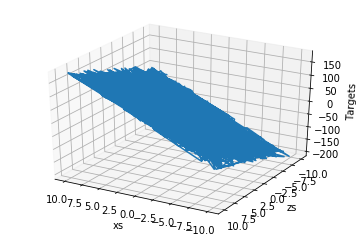

1


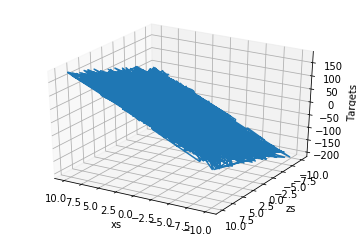

2


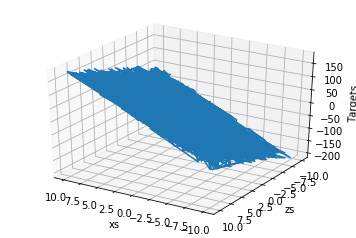

3


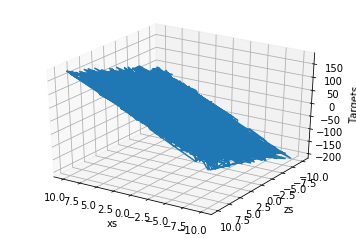

4


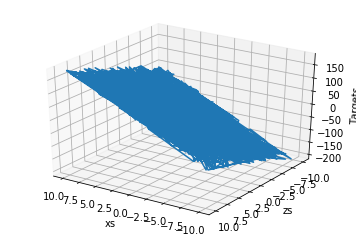

In [7]:
# To taka moja mała animacja ad-hoc, bo lubię widzieć co się dzieje w środku, 
    # a tak znacznie łatwiej to sobie zwizualizować. :P
    # Jak masz przedpotopowy sprzęt jak ja i nie masz GPU (karty graficznej), którą
    # dałoby się taki proces przyspieszyć, to polecam nie odpalać navigatora anakondy,
    # a najlepiej w ogóle zrezygnować ze środowiska graficznego i poruszać się po systemie przy pomocy basha.
    # Naturalnie jeśli Twój komputer nie dostaje zadyszki przy milionie rekordów w bazie, to pewnie
    # nie masz się czym przejmować...

    # Używamy .reshape żeby przygotować cele pod graf.
    # reshape jest w docsach do numpyego. Jako argumenty przyjmuje wymiary, którymi chcemy opisać obiekt.
targets = targets.reshape(observations,)

#Ta funkcja powiela graf tyle razy ile tego sobie życzę.
for i in range(movi):  #Zmień to sobie na większą wartość jeśli masz zasoby i chcesz z tego zrobić 'animację'.
                       #Ja wpisałem 300 i obracało się całkiem nieźle.
    graph_animator(i,observations,targets)
    
# Przywracamy poprzedni kształt celom, żeby można ich ponownie użyć do nauki.
    # Równie dobrze można było je przepisać na nową zmienną np. 'targets_plot' i teraz tego nie robić
    # ale warto znać i metodę odwrotną tak na wszelki wypadek. Pytanie co jest mniej zasobochłonne.
targets = targets.reshape(observations,1)

### 5. Inicjalizowanie zmiennych

In [8]:
# Stała (init_range). Podstawnik do funkcji generującej losowo początkowe wagi i obciążenia, dla modelu.
    # (init_range) to wartość odchylenia od zera w ramach którego sprzęt losuje nam ww. wartości początkowe.
    # Algorytm może się zawiesić jeśli nadamy 'init_range' zbyt dużą wartość| POMOC? Ostatnia działająca wartość: 0.1.
        # Można rzecz jasna eksperymentować z tą wartością i zachęcam do tego. 
        # Niemniej uważam, że najlepiej radzi sobie pozostawiona w spokoju...
init_range = 0.1

#?# ILE WAG #?# powinien zawierać mój model? || Pokrótce: ilość_wag_w_modelu = wejścia.ilość * ujścia.ilość #!#
    # || Dokładnie: Wagi mają wymiar k * m, gdzie k to ilość[zmiennych-wejściowych] (tutaj: dwie - x,z), 
    # || a m to ilość[zmiennych-wyjściowych], (tutaj: jedna - y). Logicznie matryca wag ma u nas wymiar 2x1.
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

#?# ILE BŁĘDÓW #?# systematycznych wziąć pod uwagę? || Krótko: błędy_sys_w_modelu.ilość = ujścia.ilość #!#
    # || Dłużej: Mamy jeden błąd systematyczny, gdyż jest tylko jedno ujście funkcji. Błąd systematyczny to skalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

In [9]:
# Funkcja ujednoznaczniająca, opisuje aktualny stan wag i obciążeń***. + Sanity check.
def pretty_weights():
    wagi = "wagi: %s" % weights
    obci = "obciążenia: %s" % biases
    print (wagi)
    print (obci)

In [10]:
# *** inaczej: 'błędów systematycznych'
print(LinksDict['błąd'])

https://pl.wikipedia.org/wiki/B%C5%82%C4%85d_systematyczny


In [11]:
pretty_weights()

wagi: [[0.02972125]
 [0.09196134]]
obciążenia: [-0.0756044]


### 6. Ustalanie prędkości uczenia się modelu

Ogólnie przy MNIST od Hindusa używałem 0.01 i strasznie muliło, ale w 30 krokach robiło robotę.
Warto się z tym pobawić. Zwłaszcza przy prostszych modelach, albo mocniejszych maszynach.
Ostatecznie zawsze można przerwać operacje i zmienić wartość na większą a mniej dokładną.

In [12]:
# Prędkość nauki modelu - wyciągnięta na panel główny na początku dokumentu.
learning_rate = learn # Dla mnie najlepsze osiągi dawała baza 10.000 obserwacji i prędkość 0.03-0.04.

In [13]:
# Wykonujemy 100 iteracji na naszym zestawie treningowym. Do ww parametrów było jak znalazł.
    # Ogólnie rzecz biorąc jest to nieco bardziej skomplikowane i jeszcze się tym zajmiemy,
    # ale to co musimy na tym etapie wiedzieć, to to, że wraz ze wzrostem prędkości_uczenia potrzebujemy mniej iteracji,
    # podczas gdy wraz jej spadkiem ilość iteracji potrzebnych do osiągnięcia podobnych wyników wzrasta.
        # Miej również na względzie, że zbyt wysoka prędkość nauki (learning_rate) może sprawić, 
        # że strata będzie dążyć do nieskończoności, zamiast do zera.
for i in range (100):
    
# To jest równanie modelu liniowego: y = xw + b
    # Tzn. ujścia = żródła * wagi + obciążenia.
    outputs = np.dot(inputs,weights) + biases
# Delty (deltas) to różnice pomiędzy ujściami i celami.
    # Zwróć uwagę, że tutaj delty są wektorami 1000 x 1.
    deltas = outputs - targets
    
# Bierzemy się za normę straty L2, którą dzielimy przez 2 i jeszcze przez liczbę obserwacji.
    # Chodzi tu po prostu o przeskalowanie przez stałą. Taka operacja nie zmienia logiki optymalizacji,
    # gdyż każda funkcja, która jako swoją podstawową właściwość ma to, że traci na wartości,
    # w miarę poprawiania się wyników modelu (i vice-versa tj. przy wzroście wartości funkcji wyniki się pogarszają)
    # MOŻE być użyta jako funkcja straty. Tj. liczą się tu proporcje różnic a nie wartości bezwzględne.
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # Przy każdej iteracji zwracamy funkcję straty, dzięki czemu mamy podgląd na to czy spada tak jak oczekujemy.
    print (loss)
    
# Delty również podlegają skalowaniu w taki sam sposób jak funkcja straty.
    # Mam na myśli, że w ten sposób można prędkość nauki (learning_rate) ooderwać od ilości przypadków (observations)
    # To znowu nie zmieni to logiki działania programu, ale z kolei ułatwia dobrać pojedynczą prędkość nauki
    # która pozostanie taka sama, bez względu na ilość próbek (observations).
    # Możesz spróbować rozwiązać ten problem bez przeskalowywania i zobaczyć jak Ci to odpowiada.
    deltas_scaled = deltas / observations

# Koniec końców stosujemy zasadę aktualizacji gradientu prostego. Wagi to 2x1, prędkość uczenia się jest skalarem,
    # źródła są 1000x2 a wyskalowane delty (deltas_scaled) 1000x1.
    # Transponujemy źródła (co jest dozwolone), aby móc wykonać operację tj będą teraz 2x1000. To  skraca się
    # z 1000x1 i mamy 2x1.
    # wagi = wagi - prędkość_nauki x iloczyn_skalarny**
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    # obciążenia = obciążenia - prędkość_nauki x delty_przeskalowane [skalar]
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    # Wagi są aktualizowane zgodnie z zasadami algebry liniowej (macierz minus inna macierz)
    # Mamy jeden błąd systematyczny, a zatem musimy przetransformować delty na skalar (deltas_scaled).
    # Obydwie linijki są zgodne z metodologią gradientu prostego.

3521.2259430041036
517.2598876615408
124.4785262296046
70.97220804752777
61.80653336267574
58.531253206959214
56.11168719406279
53.88352665520331
51.75616399446144
49.71464466242259
47.7541203435829
45.87119381878401
44.062769316891924
42.325895751090776
40.65774175000782
39.05558835969665
37.51682425437859
36.03894143254943
34.619531122858085
33.25627985724565
31.946965700156312
30.689454627034447
29.48169704611929
28.32172445785669
27.20764624648168
26.13764659854206
25.109981543341068
24.122976110474923
23.175021599832633
22.264572959608216
21.39014626805228
20.550316314857948
19.743714278239747
18.969025493918547
18.22498731237704
17.510387040893008
16.82405996699597
16.16488746012599
15.531795148400564
14.92375116751756
14.33976447894059
13.778883254625525
13.240193325655136
12.722816692253843
12.225910092753693
11.74866362917927
11.290299447211488
10.850070468378535
10.427259172407918
10.021176427754765
9.631160368400234
9.256575315089588
8.896810739251443
8.55128026790971
8.2194

In [14]:
# **Ależ służę uprzejmie:
print(LinksDict['iloczyn'])

https://pl.wikipedia.org/wiki/Iloczyn_skalarny


In [15]:
# Zwracamy wagi i obciążenia, żebyśmy mogli zobaczyć na ile otrzymaliśmy to co chcieliśmy.
# Gdy deklarowaliśmy cele, wiedzieliśmy, że wagi powinny mieć odpowiednio 13 i 7 a obciążenie 10.
pretty_weights()

# Krócej, choć nieco mniej czytelnie byłoby wstawić: "print(weights, biases)"
# Może być tak, że funkcja nie osiągnąła jeszcze minimum i potrzeba jej więcej iteracji.

wagi: [[13.00521752]
 [ 6.99569844]]
obciążenia: [-10.42284951]


### 7. Jaka jest (ko)relacja wyników do celów?

Sprawdzamy, czy model mierzy to co miał mierzyć.
tj. sprawdzamy jego dokładność* 

Im bliżej mu do linii pod kątem 45* tym bardziej liniowa jest zależność
między celami a wynikami zwracanimy przez funkcję.

*Poniżej link wiki pt. "Dokładność i precyzja metody pomiaru" dla dociekliwych:

In [16]:
print(LinksDict['metoda'])

Https://pl.wikipedia.org/wiki/Dok%C5%82adno%C5%9B%C4%87_i_precyzja_metody_pomiaru


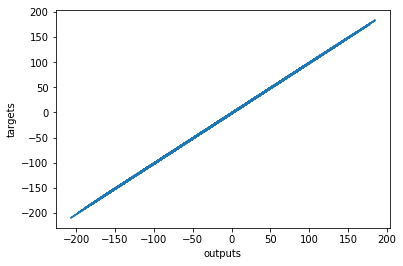

In [17]:
# Zwracamy ujścia i cele aby zobaczyć czy jest między nimi liniowa zależność. (patrz : "Dokładność metody pomiaru")
    # Wizualizacja nie jest tu konieczna, a potem nawet nie będzie możliwa do wykonania,
    # ale ogólnie warto wiedzieć jak ją wykonać, oraz co tutaj sprawdzamy i jak to wygląda na grafie.
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()